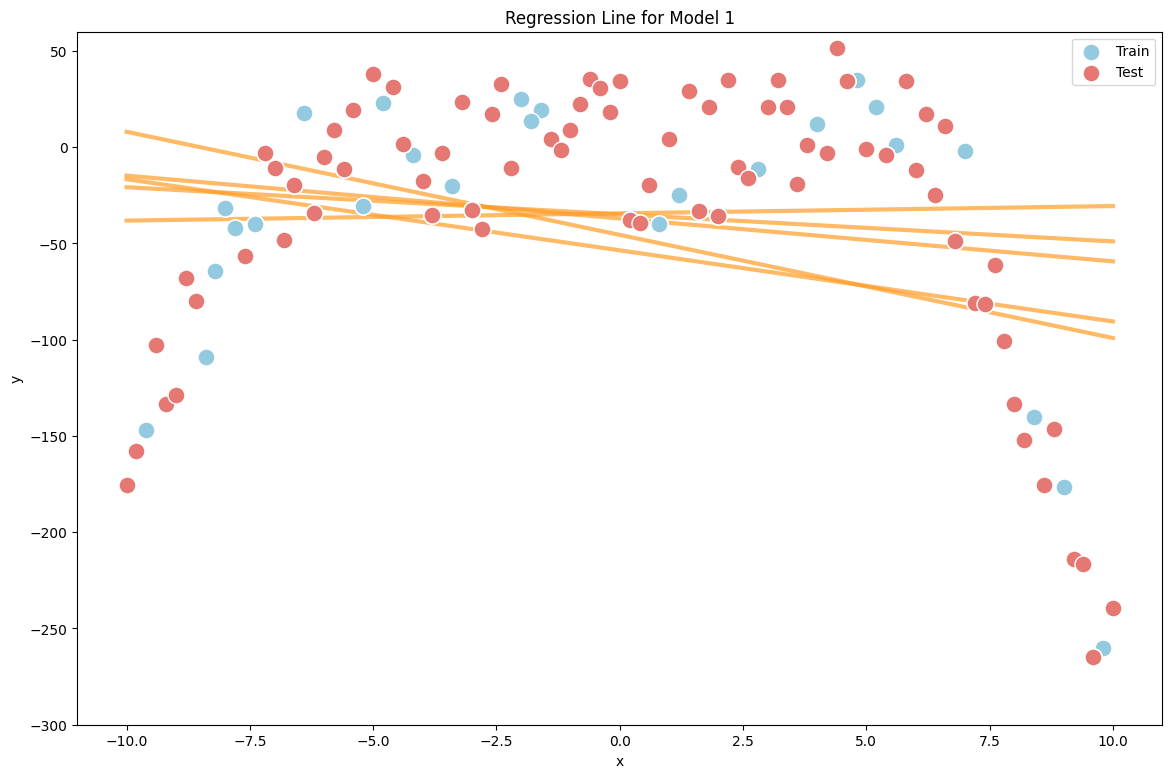

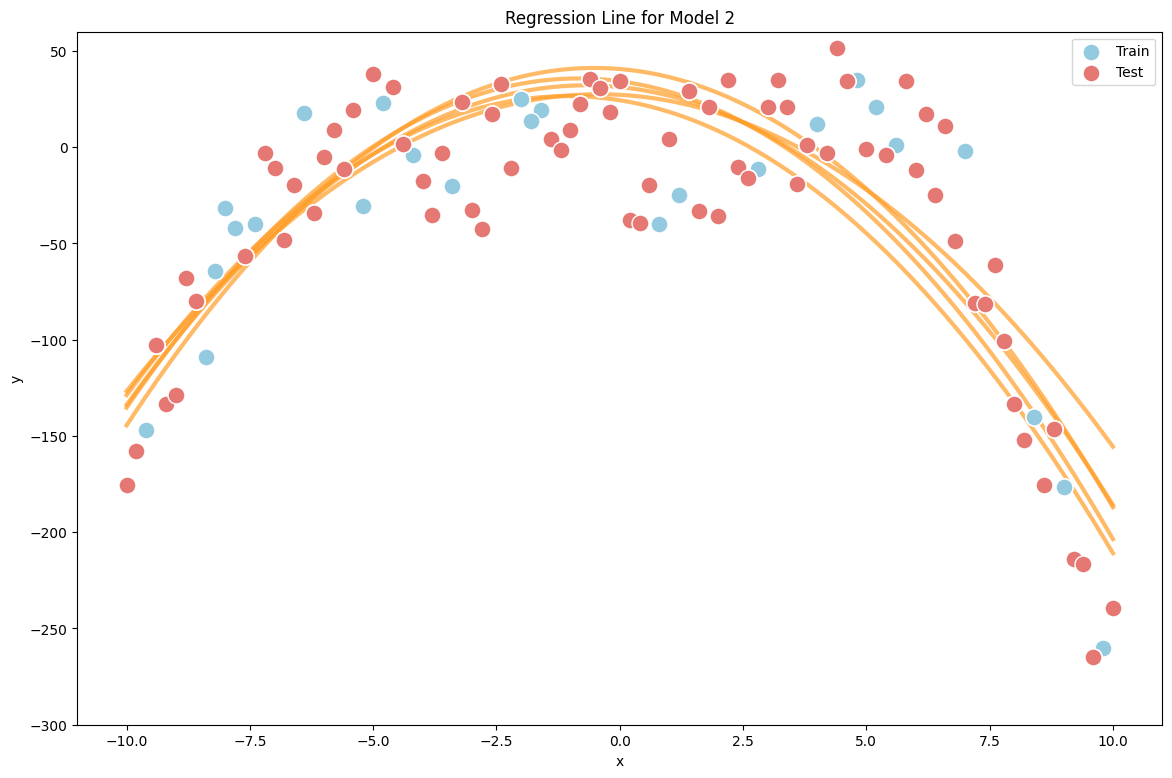

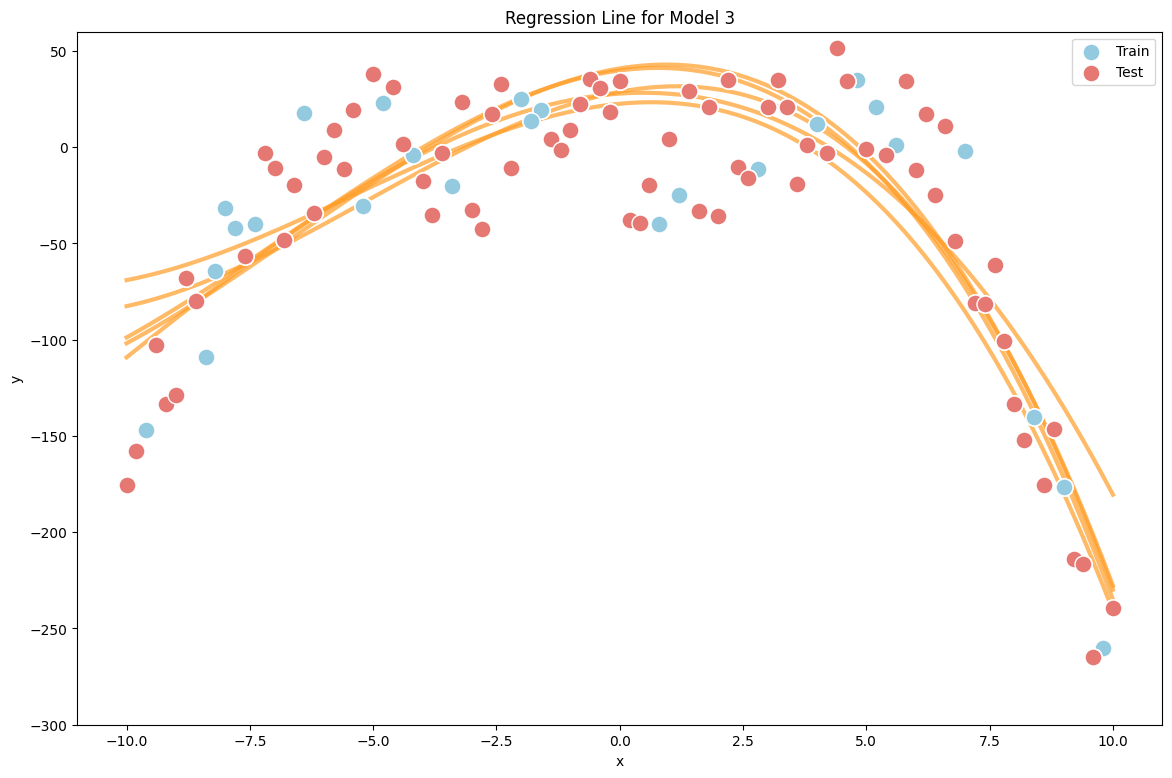

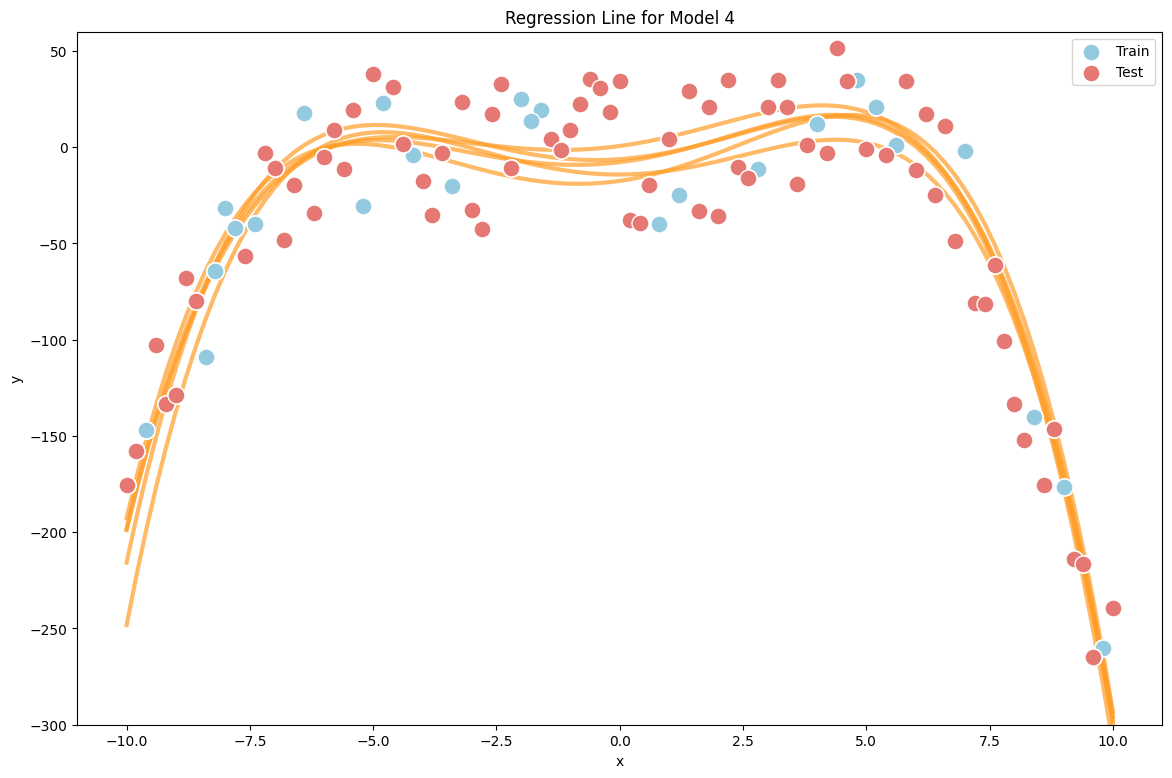

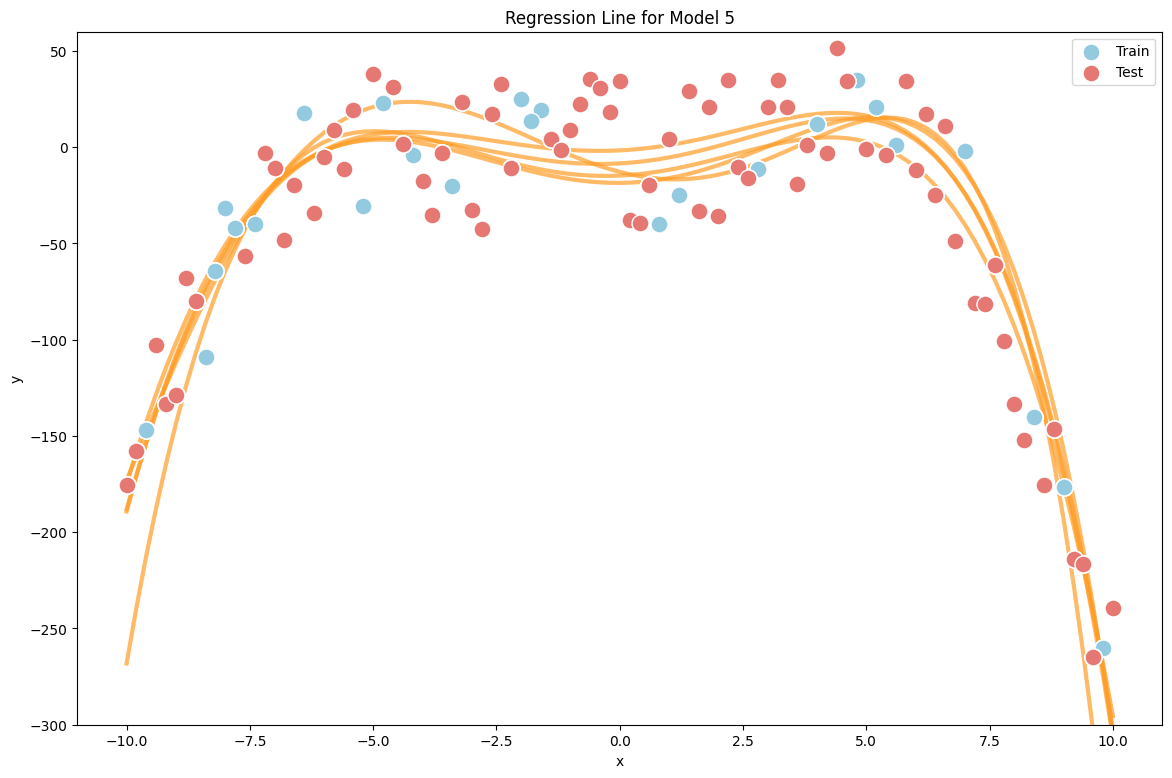

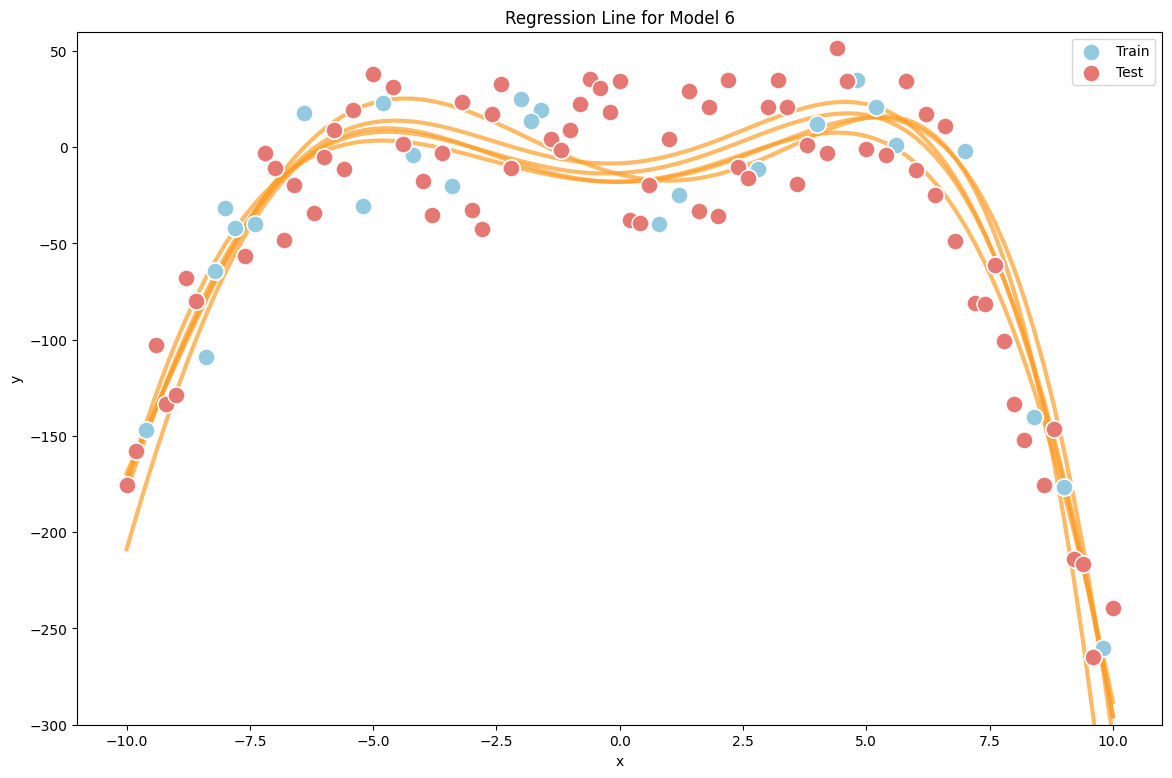

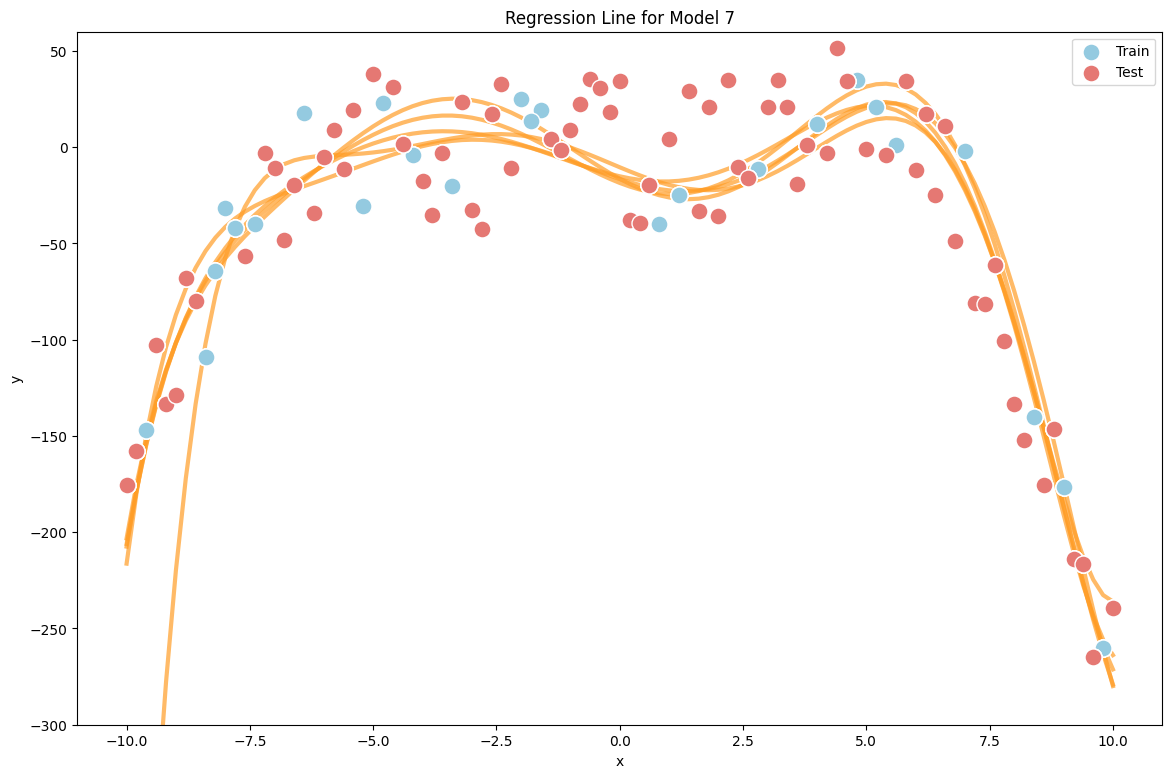

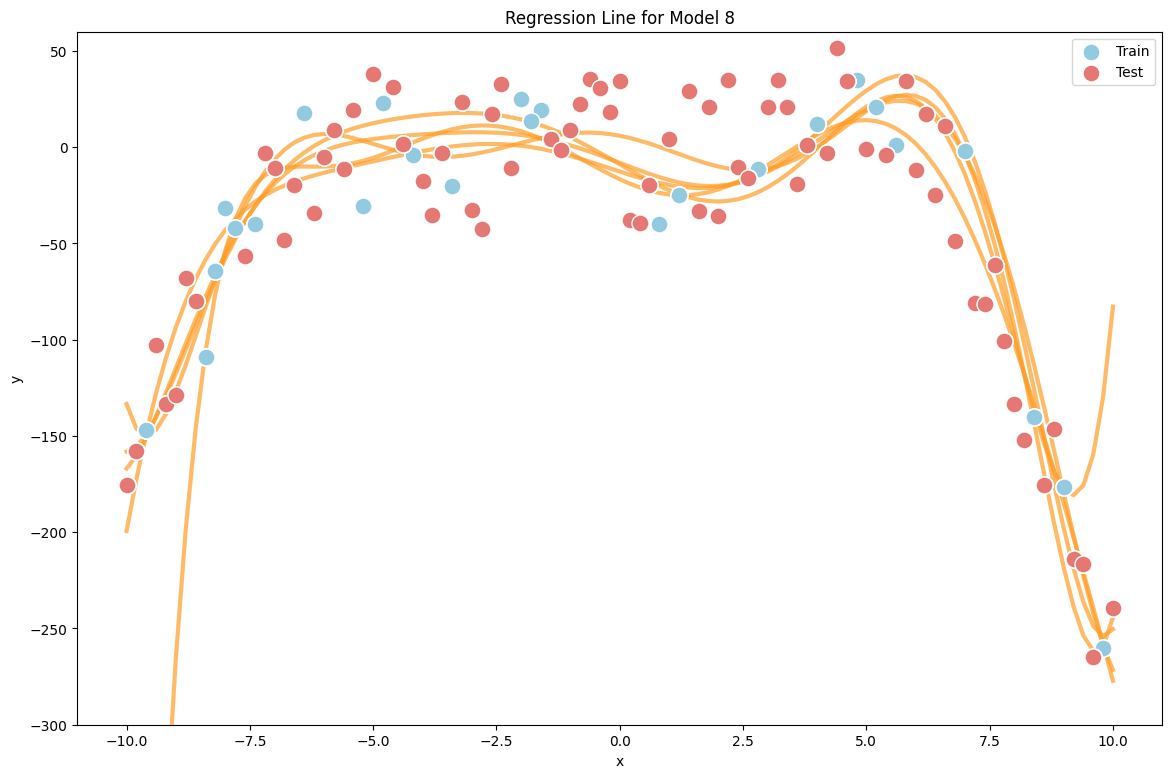

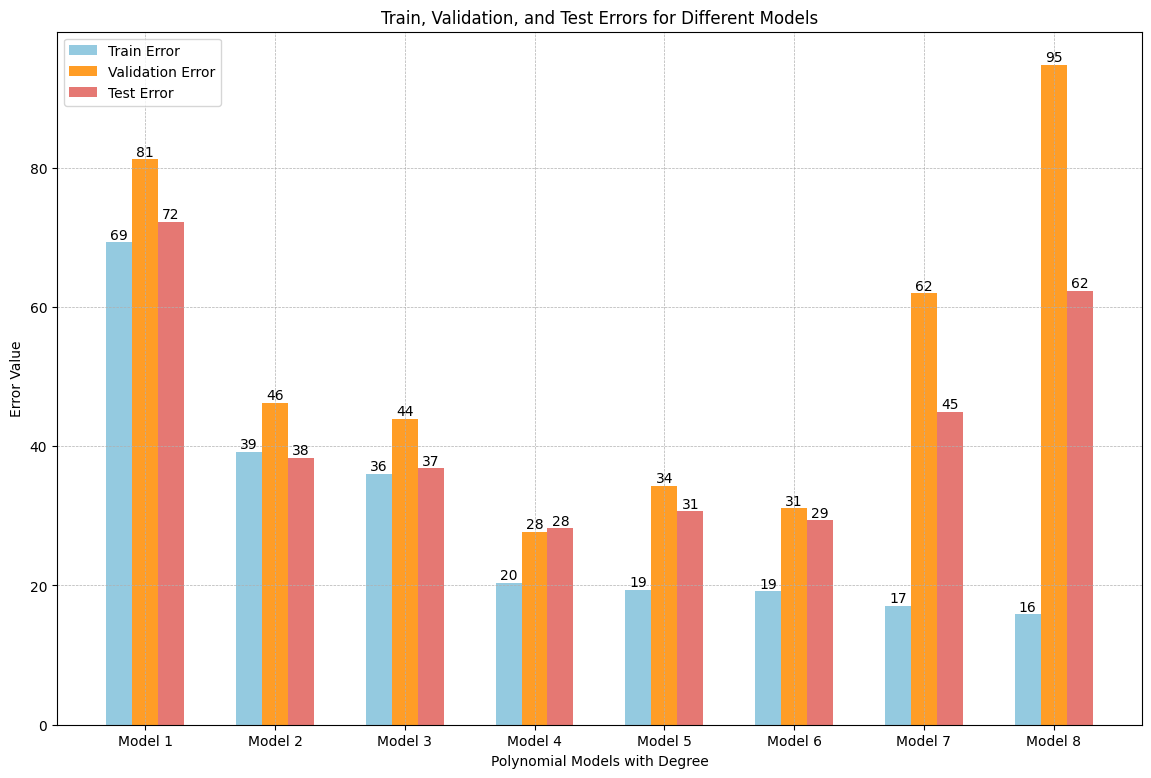

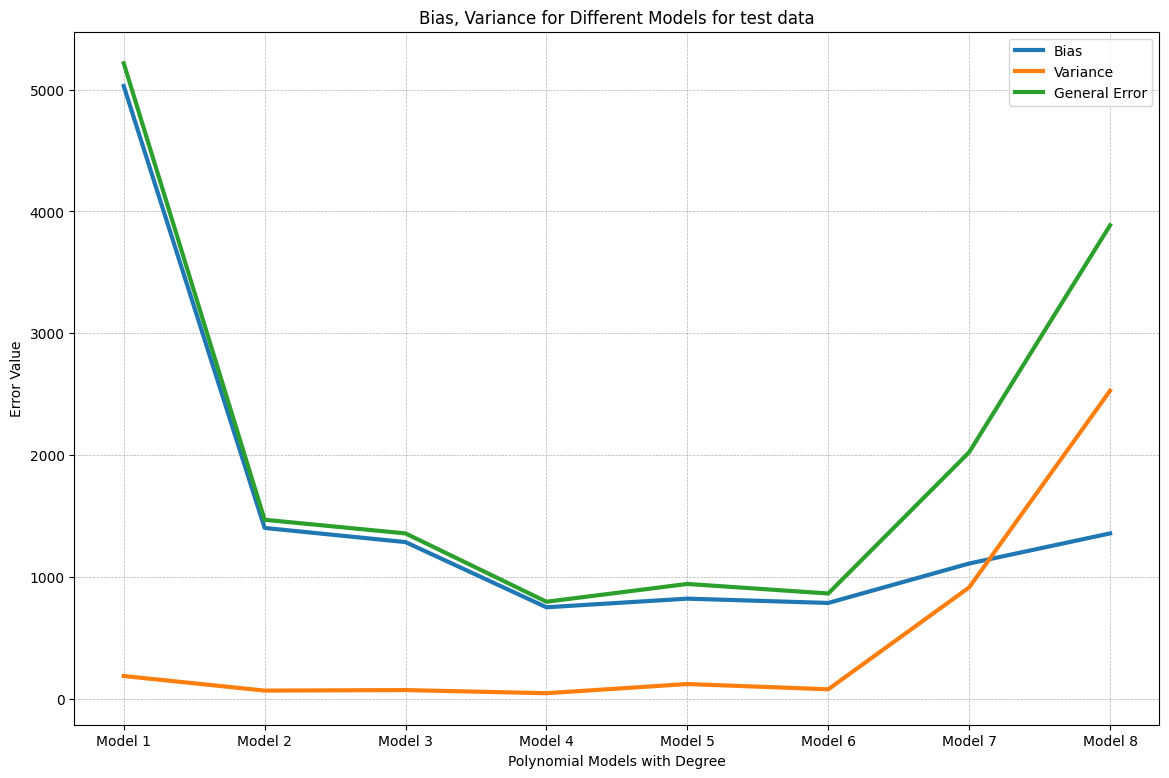

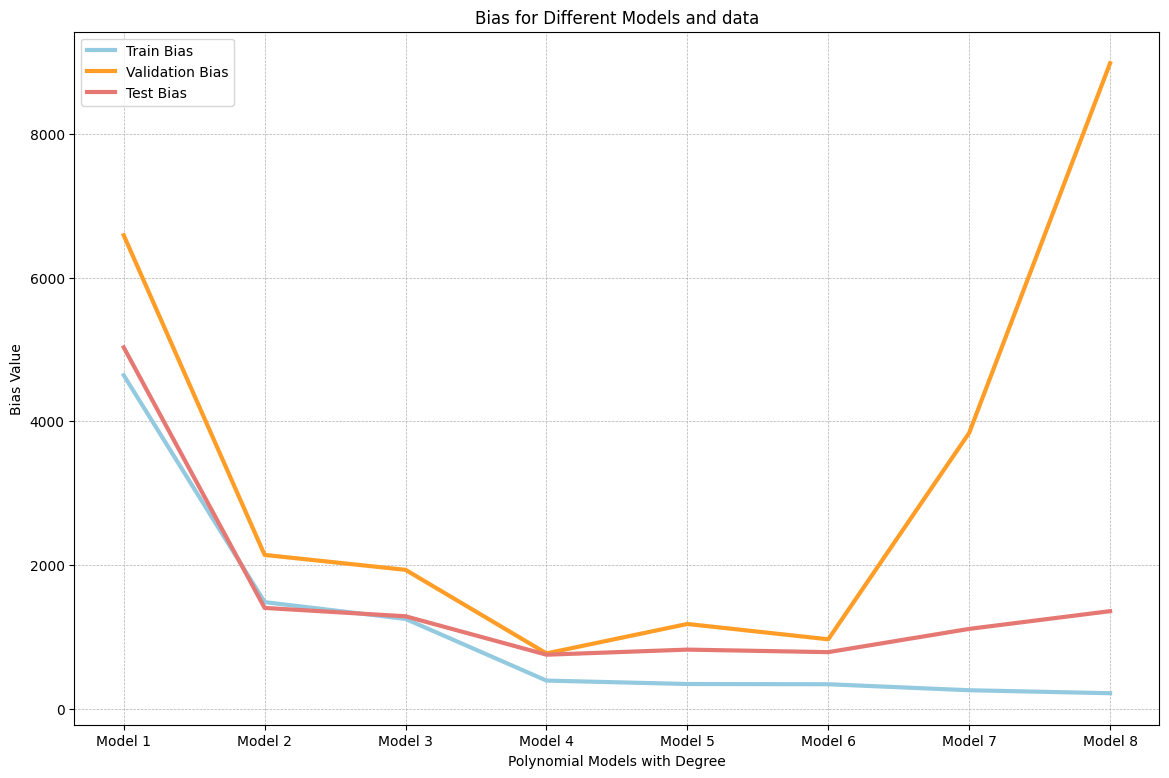

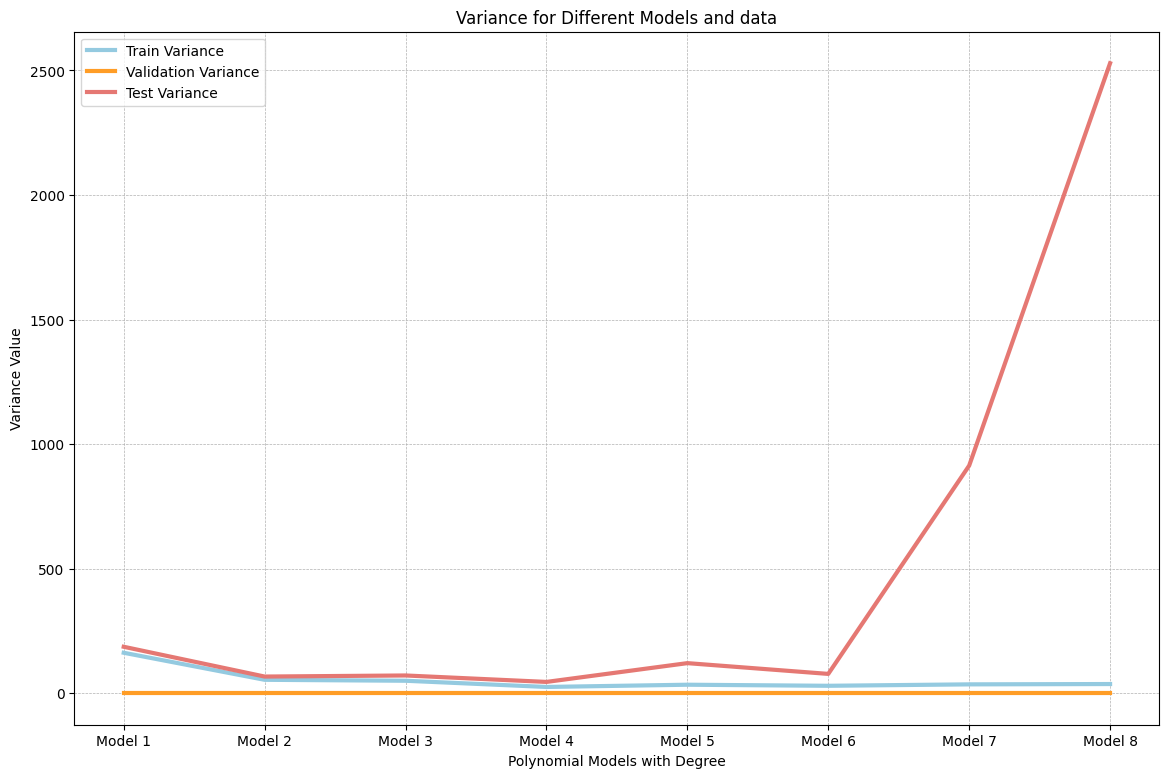

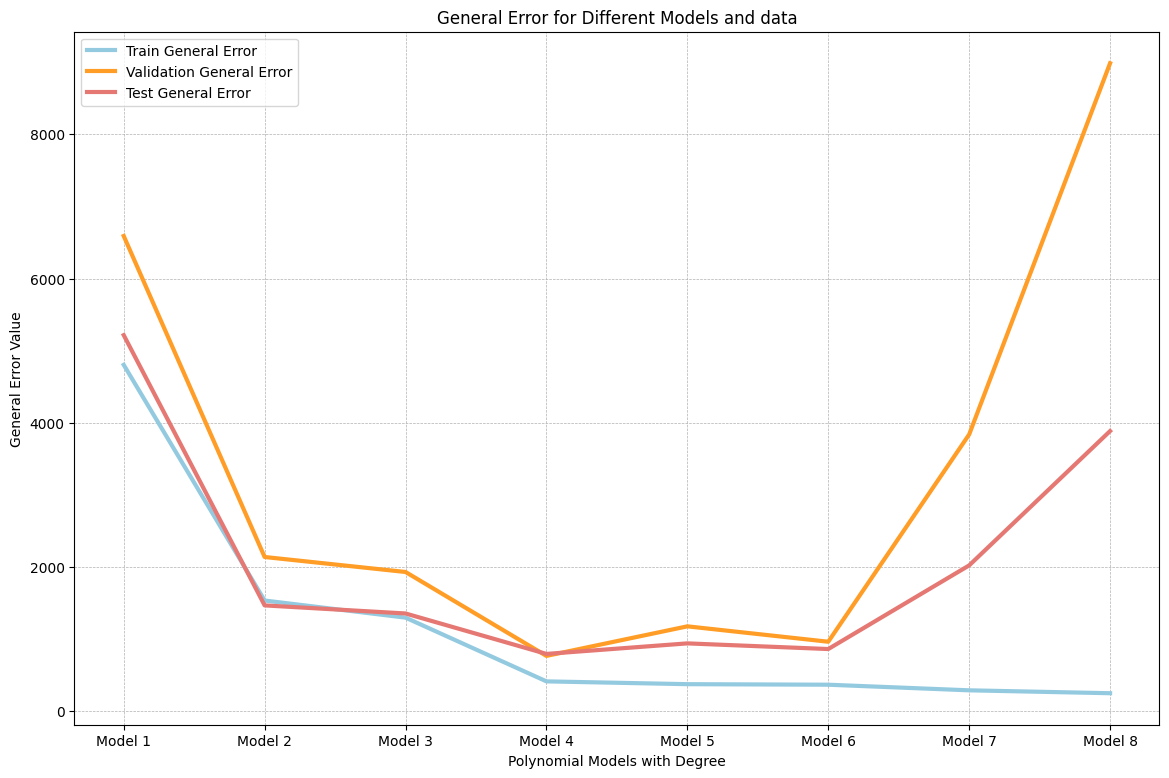

In [3]:
"""
This module contains the implementation of the Bias Variance Tradeoff.
"""

from ml_lib.data.utils import get_2d_data, split_train_test
from ml_lib.models.polynomial_regression import PolynomialRegression
from ml_lib.utils.model_evaluator import ModelEvaluator
from ml_lib.visualization.plotter import Plotter
import os

# Total number of training & testing samples
N_SAMPLES = 101
# Percent of data size to be used for training
N_TRAIN_SAMPLES = int(25 * (N_SAMPLES / 100))
# Number of testing samples
N_TEST_SAMPLES = N_SAMPLES - N_TRAIN_SAMPLES
# Figure Size
FIG_SIZE=(14, 9)

# Load the data
x, y = get_2d_data(N_SAMPLES, coeffs=[0.5, 1, -5, 1], data_range=[-10, 10])

# Split the data into`` training and testing data
x_train, y_train, x_test, y_test = split_train_test(x, y, N_TRAIN_SAMPLES)

# Define the polynomial models
models = [PolynomialRegression(degree) for degree in range(1, 9, 1)]

# Initialize the ModelEvaluator class
model_evaluator = ModelEvaluator(models, x_train, y_train, x_test, y_test,
                                    N_TRAIN_SAMPLES, N_TEST_SAMPLES)

# Get the model names
model_name = [f"Model {model.degree_}" for model in models]

# get parent working directory
pwd = os.path.dirname(os.getcwd())

# get the repository path not the cwd
result_path = pwd + "/results/bias_variance_tradeoff/"

plotter = Plotter(FIG_SIZE, model_name, result_path)

# Evaluate the models
rmse_all_model, bias_all_model, variance_all_model, general_error_all_model = model_evaluator.evaluate_models(plotter, save_fig=True)

# Plot the RMSE values for the training, validation, and testing data for different models
plotter.plot_rmse(rmse_all_model, True)

# Plot the bias, variance, and general error for the test data for different models
plotter.plot_bias_variance(bias_all_model, variance_all_model, general_error_all_model, True)

# Plot the bias for training, validation and test data for different models
plotter.plot_bias(bias_all_model, True)

# Plot the variance for training, validation and test data for different models
plotter.plot_variance(variance_all_model, True)

# Plot the general error for training, validation and test data for different models
plotter.plot_general_error(general_error_all_model, True)